# Init

In [1]:
%matplotlib inline

import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import watpy

# Explore the entire database

I had to modify the 'watpy/coredb/coredb.py' module to force git to ignore the SSL auto-signed certificate from the source, since it was a pain in the ass to understand how to make it work. I just added to the environmen variables `GIT_SSL_NO_VERIFY=true` when calling `git clone` through their custom function `coredb.runcmd` by adding a kwarg 'env' passed to the actual kwarg 'env' of python's `subprocess.Popen`.

Scheme:
```
myenv = os.environ.copy()
myenv['GIT_SSL_NO_VERIFY'] = 'true'
runcmd(..., env=myenv)  # which calls Popen(..., env=env)
```

In [2]:
cdb = watpy.coredb.coredb.CoRe_db('../../CoRe_DB_clone/')

Index found, updating...

git-pull core_database_index ...
 
done!


In [3]:
idb = cdb.idb
print(idb.dbkeys)

['BAM:0001', 'BAM:0002', 'BAM:0003', 'BAM:0004', 'BAM:0005', 'BAM:0006', 'BAM:0007', 'BAM:0008', 'BAM:0009', 'BAM:0010', 'BAM:0011', 'BAM:0012', 'BAM:0013', 'BAM:0014', 'BAM:0015', 'BAM:0016', 'BAM:0017', 'BAM:0018', 'BAM:0019', 'BAM:0020', 'BAM:0021', 'BAM:0022', 'BAM:0023', 'BAM:0024', 'BAM:0025', 'BAM:0026', 'BAM:0027', 'BAM:0028', 'BAM:0029', 'BAM:0030', 'BAM:0031', 'BAM:0032', 'BAM:0033', 'BAM:0034', 'BAM:0035', 'BAM:0036', 'BAM:0037', 'BAM:0038', 'BAM:0039', 'BAM:0040', 'BAM:0041', 'BAM:0042', 'BAM:0043', 'BAM:0044', 'BAM:0045', 'BAM:0046', 'BAM:0047', 'BAM:0048', 'BAM:0049', 'BAM:0050', 'BAM:0051', 'BAM:0052', 'BAM:0053', 'BAM:0054', 'BAM:0055', 'BAM:0056', 'BAM:0057', 'BAM:0058', 'BAM:0059', 'BAM:0060', 'BAM:0061', 'BAM:0062', 'BAM:0063', 'BAM:0064', 'BAM:0065', 'BAM:0066', 'BAM:0067', 'BAM:0068', 'BAM:0069', 'BAM:0070', 'BAM:0071', 'BAM:0072', 'BAM:0073', 'BAM:0074', 'BAM:0075', 'BAM:0076', 'BAM:0077', 'BAM:0078', 'BAM:0079', 'BAM:0080', 'BAM:0081', 'BAM:0082', 'BAM:0083', 'BA

In [4]:
# Show the metadata in the CoRe DB index for selected simulation:
database_key = 'BAM:0001'

i = idb.dbkeys.index(database_key)
idb.index[i].data

{'database_key': 'BAM:0001',
 'available_runs': 'R01, R02, R03, R04',
 'simulation_name': '2B_1.350_1.350_0.00_0.00_0.038',
 'binary_type': 'BNS',
 'reference_bibkeys': 'Bernuzzi:2014owa',
 'id_code': 'LORENE',
 'id_type': 'Irrotational',
 'id_mass': '2.699952e+00',
 'id_rest_mass': '3.050133e+00',
 'id_mass_ratio': '1.000000e+00',
 'id_ADM_mass': '2.677624e+00',
 'id_ADM_angularmomentum': '7.662564e+00',
 'id_gw_frequency_Hz': '4.545056e+02',
 'id_gw_frequency_Momega22': '3.797735e-02',
 'id_eos': '2B',
 'id_kappa2T': '2.376117e+01',
 'id_Lambda': '1.267263e+02',
 'id_eccentricity': '7.092541e-03',
 'id_mass_starA': '1.349976e+00',
 'id_rest_mass_starA': '1.525067e+00',
 'id_spin_starA': '0, 0, 0',
 'id_LoveNum_kell_starA': '6.899000e-02, 1.746000e-02, 5.990000e-03',
 'id_Lambdaell_starA': '1.267263e+02, 1.524837e+02, 1.776546e+02',
 'id_mass_starB': '1.349976e+00',
 'id_rest_mass_starB': '1.525067e+00',
 'id_spin_starB': '0, 0, 0',
 'id_LoveNum_kell_starB': '6.899000e-02, 1.746000e-0

Use the method `CoRe_db.show` to plot histograms of any metadata available in the DB.

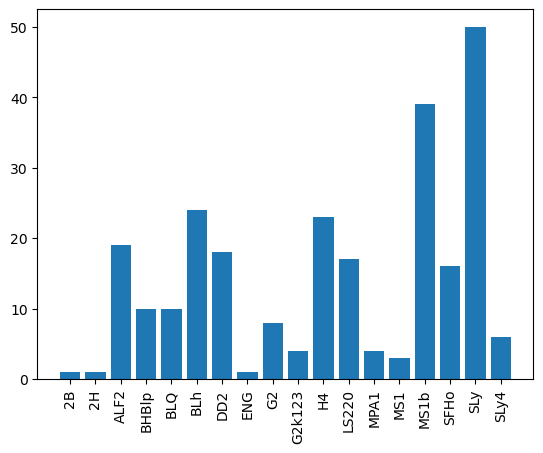

In [5]:
# EoS
fig, ax = idb.show('id_eos', False)

# Download and Explore SLy

In [6]:
eos_key = 'SLy4'

md_list = [i for i in idb.index if i.data['id_eos']==eos_key]
dbkeys = [i.data['database_key'] for i in md_list]

In [7]:
# Download sim data if not already present:
cdb.sync(dbkeys=dbkeys, lfs=True, verbose=False, prot='https')

In [8]:
sims = cdb.sim  # simulation manager

## Single sim comparison Runs

In [9]:
sim = sims[dbkeys[0]]
print(sim.run.keys())

dict_keys(['R02', 'R01'])


### R01

In [10]:
run = sim.run['R01']
# Load downloaded simulation run:
run_data = run.data.read_dset()
# Select only the strain:
run_strain = run_data['rh_22']

print(run_strain.keys())

dict_keys(['Rh_l2_m2_r00400.txt'])


{'database_key': 'THC:0093:R01',
 'available_runs': None,
 'simulation_name': 'SLy4_1.364_1.364_0.00_0.00_0.024_M0_0.125',
 'binary_type': 'BNS',
 'reference_bibkeys': 'Nedora:2020hxc',
 'id_code': 'LORENE',
 'id_type': 'Irrotational',
 'id_mass': '2.728',
 'id_rest_mass': '3.0587775667740837',
 'id_mass_ratio': '1.0',
 'id_ADM_mass': '2.703',
 'id_ADM_angularmomentum': '7.399',
 'id_gw_frequency_Hz': '282.53',
 'id_gw_frequency_Momega22': '0.02385421530416646',
 'id_eos': 'SLy4',
 'id_kappa2T': '67.72207617470337',
 'id_Lambda': '361.18440626508465',
 'id_eccentricity': '',
 'id_mass_starA': '1.364',
 'id_rest_mass_starA': '1.5293887833870419',
 'id_spin_starA': '0,0,0',
 'id_LoveNum_kell_starA': '0.08004225267396532,0.020699947690852226,0.007271991987259579',
 'id_Lambdaell_starA': '361.18440626508465,636.2229222057189,1087.4161907794696',
 'id_mass_starB': '1.364',
 'id_rest_mass_starB': '1.5293887833870419',
 'id_spin_starB': '0,0,0',
 'id_LoveNum_kell_starB': '0.08004225267396532,

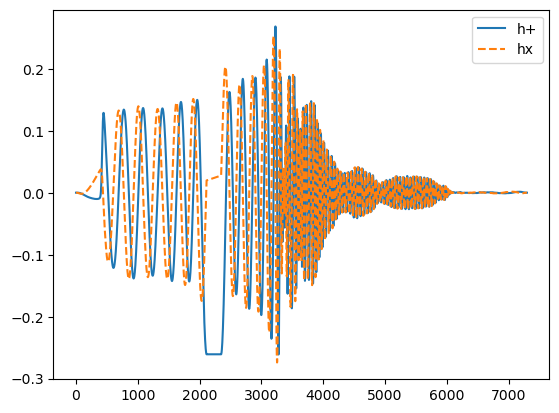

In [11]:
# Select run with highest r distance:
gw_data = run_strain['Rh_l2_m2_r00400.txt']
# Select time and (h+, hx) columns only
t, hp, hx = gw_data[:,[8,1,2]].T

fig, ax = plt.subplots()
ax.plot(t, hp, label='h+')
ax.plot(t, hx, ls='--', label='hx')
ax.legend()

run.md.data

### R02

In [12]:
run = sim.run['R02']
# Load downloaded simulation run:
run_data = run.data.read_dset()
# Select only the strain:
run_strain = run_data['rh_22']

print(run_strain.keys())

dict_keys(['Rh_l2_m2_r00400.txt'])


{'database_key': 'THC:0093:R02',
 'available_runs': None,
 'simulation_name': 'SLy4_1.364_1.364_0.00_0.00_0.024_M0_0.167',
 'binary_type': 'BNS',
 'reference_bibkeys': 'Nedora:2020hxc',
 'id_code': 'LORENE',
 'id_type': 'Irrotational',
 'id_mass': '2.728',
 'id_rest_mass': '3.0587775667740837',
 'id_mass_ratio': '1.0',
 'id_ADM_mass': '2.703',
 'id_ADM_angularmomentum': '7.399',
 'id_gw_frequency_Hz': '282.53',
 'id_gw_frequency_Momega22': '0.02385421530416646',
 'id_eos': 'SLy4',
 'id_kappa2T': '67.72207617470337',
 'id_Lambda': '361.18440626508465',
 'id_eccentricity': '',
 'id_mass_starA': '1.364',
 'id_rest_mass_starA': '1.5293887833870419',
 'id_spin_starA': '0,0,0',
 'id_LoveNum_kell_starA': '0.08004225267396532,0.020699947690852226,0.007271991987259579',
 'id_Lambdaell_starA': '361.18440626508465,636.2229222057189,1087.4161907794696',
 'id_mass_starB': '1.364',
 'id_rest_mass_starB': '1.5293887833870419',
 'id_spin_starB': '0,0,0',
 'id_LoveNum_kell_starB': '0.08004225267396532,

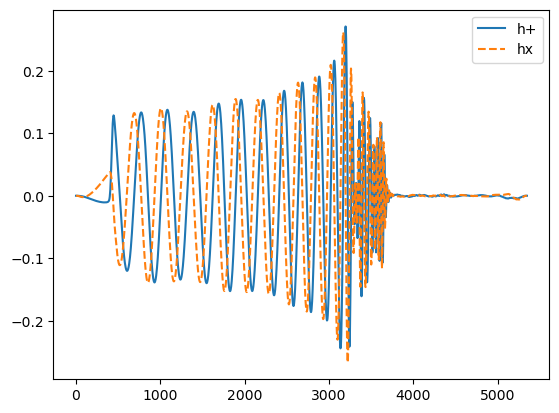

In [13]:
# Select run with highest r distance:
gw_data = run_strain['Rh_l2_m2_r00400.txt']
# Select time and (h+, hx) columns only
t, hp, hx = gw_data[:,[8,1,2]].T

fig, ax = plt.subplots()
ax.plot(t, hp, label='h+')
ax.plot(t, hx, ls='--', label='hx')
ax.legend()

run.md.data

### CONCLUSIONS

Between runs the main difference appears to be the eccentricity parameter, which yields an effective new GW waveform. Therefore I can use all runs each simulation has.